<h1>This task is to understand algerian forest fire dataset using <b>Ridge Regression</b> model</h1>



In [1]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
# Initializing the dataset 

DATA = "https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/INeuron-Classes-Assignments/main/Assignments/151022/forestfires.csv"

In [3]:
# Reading the dataset using read csv function

dataset = pd.read_csv(DATA)

In [4]:
COLUMN_DESCRIPTIONS = {
    "FFMC": "Fine Fuel Moisture Code", 
    "DMC": "Duff Moisture Code",
    "DC": "Drought Code",
    "ISI": "The ISI is a score that correlates with fire velocity spread",
    "temp": "Temperature in Celsius degrees",
    "RH": "Relative humidity in %",
    "wind": "Wind speed in km/h",
    "rain": "Outside rain in mm/m2",
    "area": "The burned area of the forest in ha"
}

In [5]:
# Data preview

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
# Identifying the missing columns

dataset.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Text(0, 0.5, 'Temperature in Celsius degrees')

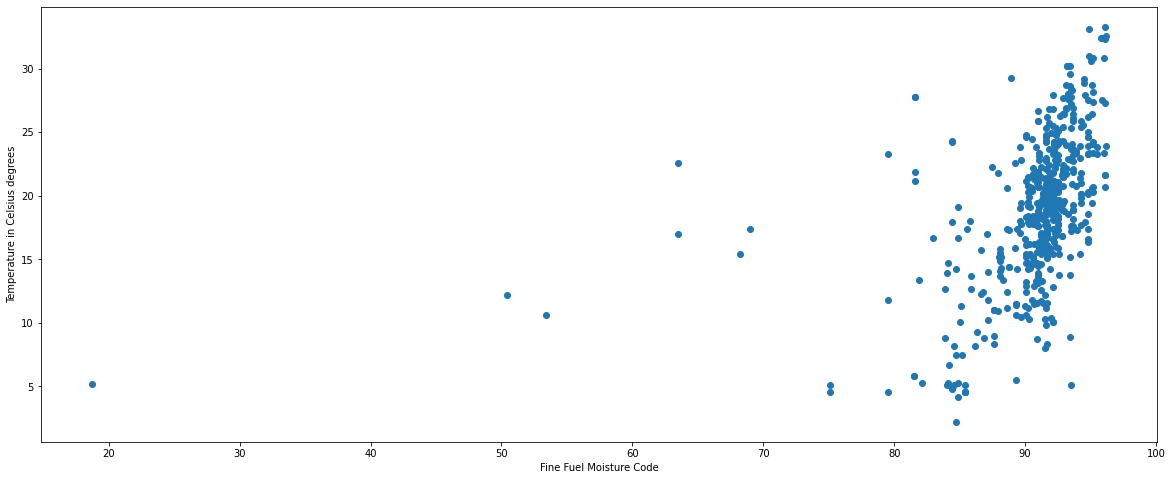

In [7]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['FFMC'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('FFMC'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


Text(0, 0.5, 'Temperature in Celsius degrees')

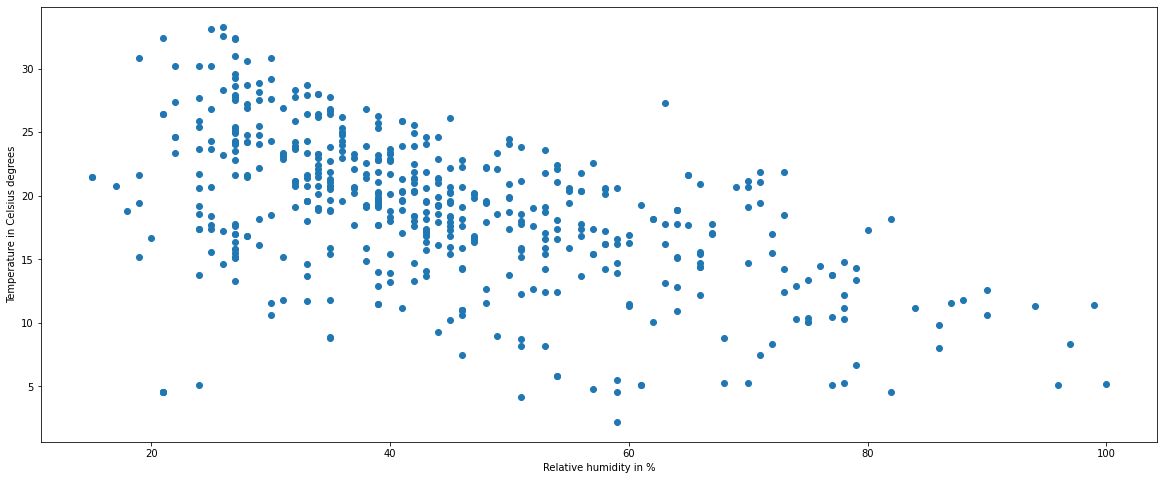

In [8]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['RH'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('RH'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


In [9]:
# Creating training models

In [10]:
### Identifying dependent and independent feature


X = dataset[['FFMC', 'RH']]
y = dataset['temp']

In [11]:
# Model selection

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [14]:
# Analyzing X & y train data

print(type(X_train), type(y_train), len(X_train), len(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> 346 346


In [15]:
# Standardize the dataset

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
# Performing fit and transformation on train and test data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
## Model training

In [20]:
from sklearn.linear_model import Ridge

In [21]:
ridge = Ridge()

In [22]:
ridge.fit(X_train, y_train)

Ridge()

In [23]:
## print cofficient and intercept

print("Coefficient: ", ridge.coef_)
print("Intercept: ", ridge.intercept_)

Coefficient:  [ 1.59232353 -2.85678203]
Intercept:  19.002601156069364


In [24]:
#Prediction for test data
ridge_prediction = ridge.predict(X_test)

In [25]:
ridge_prediction

array([22.73558276, 19.36200354, 19.7289596 , 17.86934296, 14.58971173,
       11.45016684, 22.28528177, 19.39214142, 20.27674292, 13.51191274,
       21.15241264, 22.15236003, 22.1257565 , 23.22132315, 21.69312727,
       14.2493592 , 22.46964338, 19.4860894 , 21.41128332, 20.27497575,
       22.696609  , 18.17425609, 11.66289916, 19.64031314, 13.15555973,
       17.29672329, 21.69312727, 17.79129956, 20.99475046, 21.61164541,
       17.29849046, 23.00859083, 17.24891366, 12.35244009, 22.82776356,
       20.54621664, 11.97664816, 11.69303703, 18.42066064, 18.41712629,
       16.99887886, 13.8859375 , 19.85304546, 16.34301016, 19.39214142,
       14.59501326, 22.79232416, 19.26805556, 18.05370458, 19.53389903,
       11.60076032, 19.33009849, 18.90286668, 24.82746654, 20.72527673,
       23.95346809, 22.73734993, 21.60634388, 21.18971512, 22.67707418,
       22.25160954, 21.94846359, 23.25499538, 19.72719242, 20.54798382,
       21.24468935, 19.08369394, 22.49624691, 20.6064924 , 22.64

In [26]:
# Assumptions

Text(0, 0.5, 'Test predicted data')

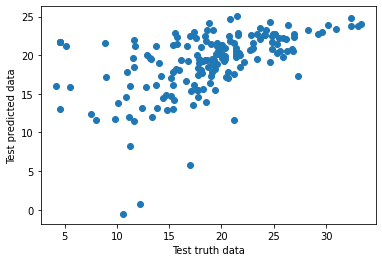

In [27]:
plt.scatter(y_test, ridge_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

Text(0, 0.5, 'Test predicted data')

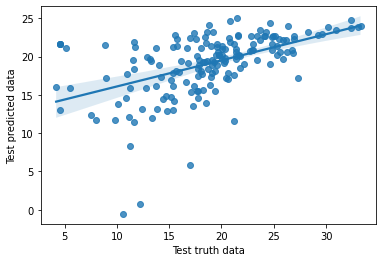

In [28]:
sns.regplot(x = y_test, y = ridge_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

In [29]:
# residuals
# Errors

residuals = y_test - ridge_prediction

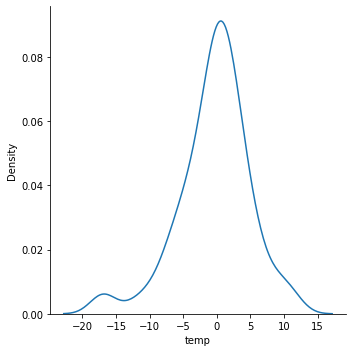

In [30]:
sns.displot(residuals, kind="kde")

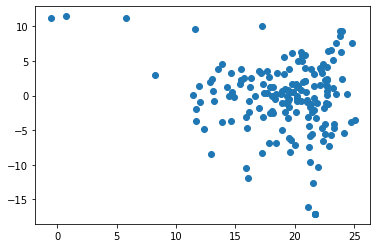

In [31]:
plt.scatter(ridge_prediction, residuals)

In [32]:
# Cost function analysis

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, ridge_prediction)
MAE = mean_squared_error(y_test, ridge_prediction)
print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Square Error", np.sqrt(MSE))

Mean Squared Error 28.153112867625413
Mean Absolute Error 28.153112867625413
Root Mean Square Error 5.305950703467326


In [34]:
# Performance metrics

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ridge_prediction)
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [36]:
print("R Squared: ", score)
print("Adjusted R Sqaured: ", adj_score)

R Squared:  0.22477829133493354
Adjusted R Sqaured:  0.2155494614698732
